# Data Analysis

In [1]:
import math
import IPython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing, decomposition, discriminant_analysis
from sklearn.datasets import load_breast_cancer

pd.options.display.max_columns = None

In [2]:
breast_cancer_dict = load_breast_cancer()
raw_breast_cancer_data = pd.concat([pd.DataFrame(breast_cancer_dict.data, columns=breast_cancer_dict.feature_names),
                                    pd.Series(breast_cancer_dict.target, name='TARGET')], axis=1)

In [4]:
raw_breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
raw_breast_cancer_data['TARGET'].value_counts()

1    357
0    212
Name: TARGET, dtype: int64

# Data Cleaning

In [6]:
all_columns = list(set(raw_breast_cancer_data.columns.values.tolist()))

non_features = ['TARGET']

categorical_features = []

flag_features = []

numerical_features = list(set(all_columns) - set(non_features) - set(categorical_features) - set(flag_features))

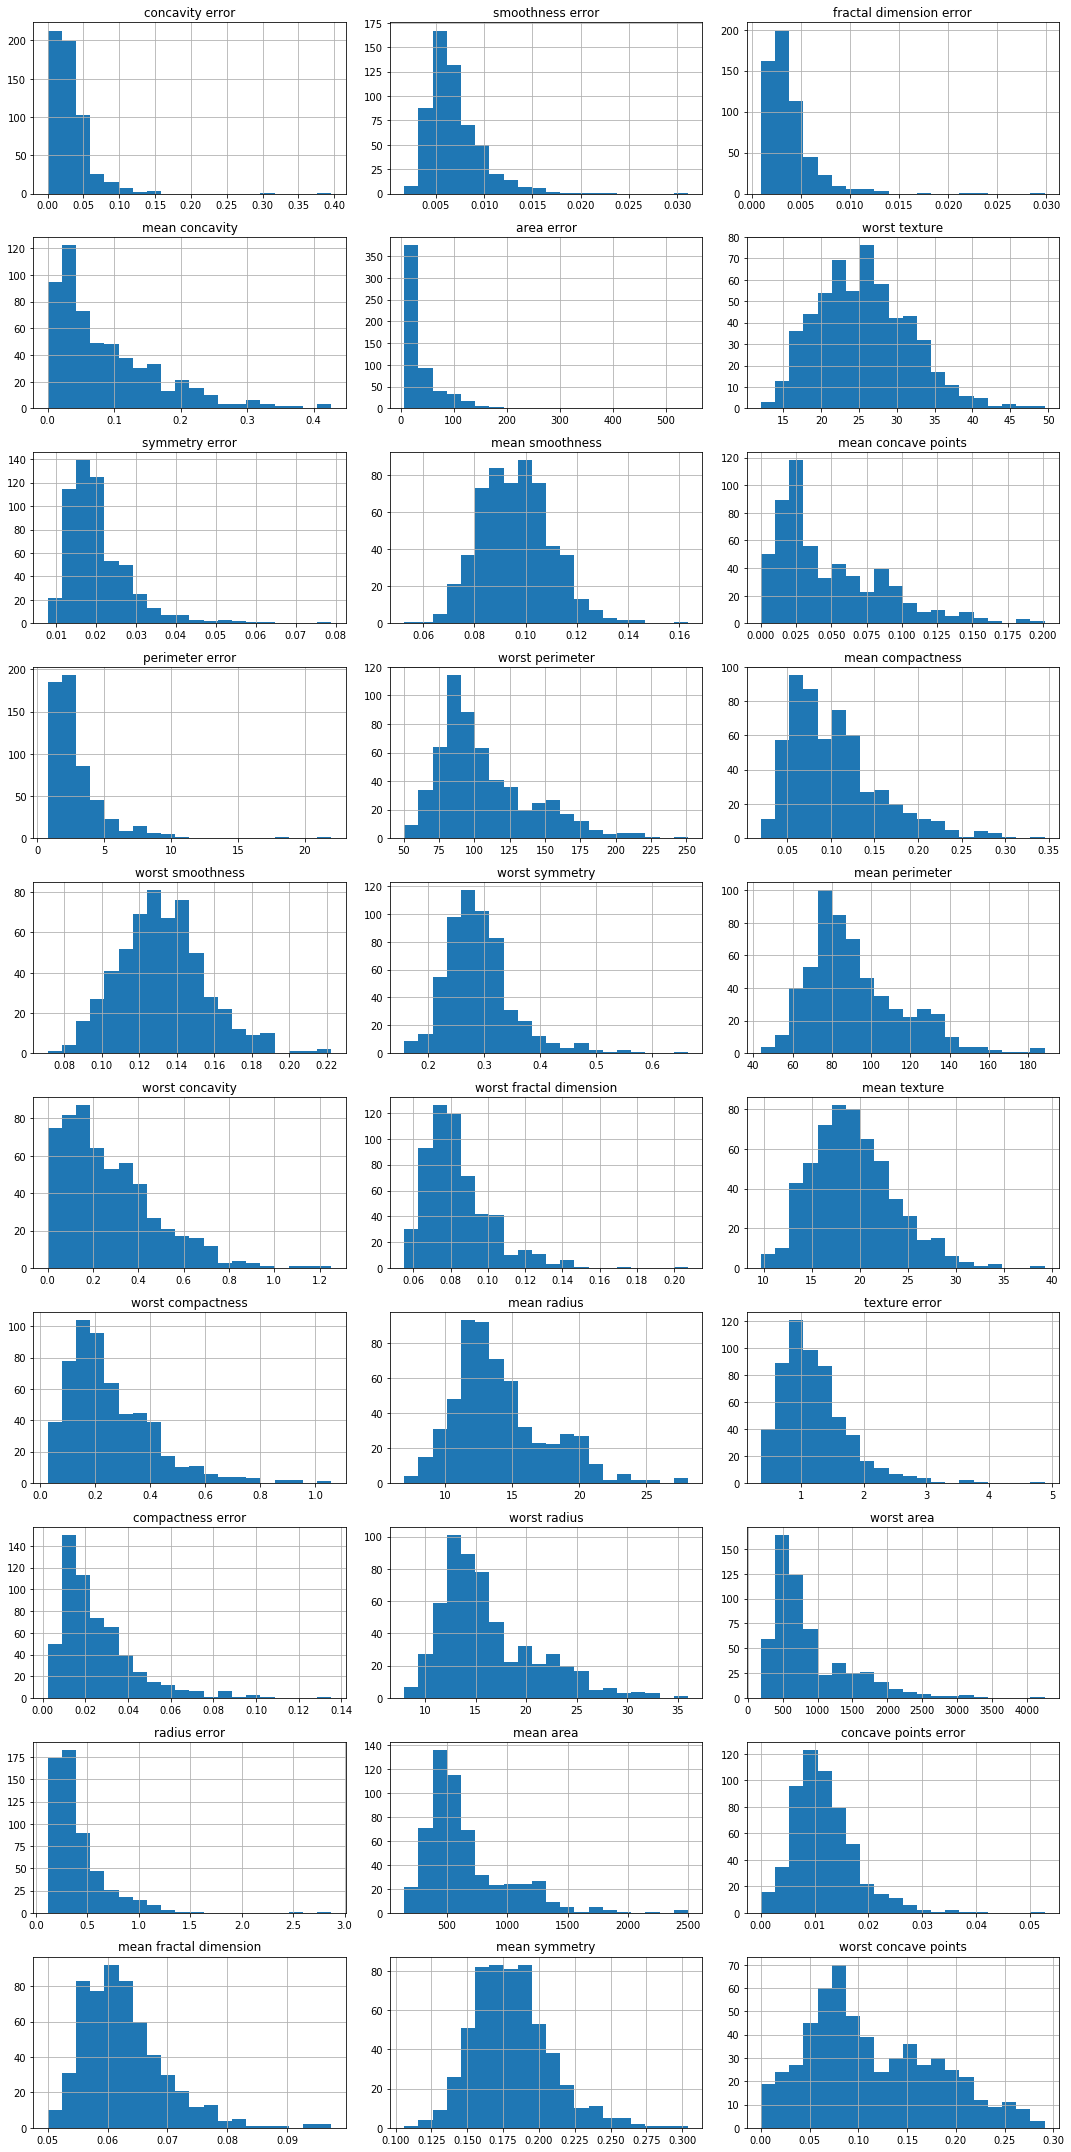

In [12]:
%matplotlib inline

no_rows = 10
no_cols = 3
plt.figure(figsize=(15, no_rows * 3))
for index, feature in enumerate(numerical_features):
    plt.subplot(no_rows, no_cols, index + 1)
    plt.title(feature)
    raw_breast_cancer_data[feature].hist(bins=20)
plt.tight_layout()

In [13]:
def fill_missing_data(df, train_df=None):
    new_df = df.copy()
    new_train_df = train_df.copy() if train_df is not None else None
    
    median_comp_df = new_train_df if new_train_df is not None else new_df
    for col in new_df.columns.values:
        if new_df[col].dtype == np.float or new_df[col].dtype == np.int:
            new_df[col] = new_df[col].fillna(median_comp_df[col].median())
        elif new_df[col].dtype == np.object:
            new_df[col] = new_df[col].fillna(median_comp_df[col].value_counts().idxmax())
    
    return new_df

def handle_outlier(df):
    new_df = df.copy()

    return new_df

def scale_data(df, train_df=None):
    new_df = df.copy()
    new_train_df = train_df.copy() if train_df is not None else None
    
    scale_df = new_train_df if new_train_df is not None else new_df
    
    for feature in numerical_features:
        if feature in new_df and (scale_df[feature].dtype == np.float64 or scale_df[feature].dtype == np.int64):
            stdsc = (preprocessing.StandardScaler()).fit(scale_df[feature].values.reshape(-1, 1))
            new_df[feature] = stdsc.transform(new_df[feature].values.reshape(-1, 1))
    
    return new_df

def clean_data(df, train_df=None):     
    new_df = df.copy()
    new_train_df = train_df.copy() if train_df is not None else None
    
    # Missing Values
    new_df = fill_missing_data(new_df, new_train_df)
    new_train_df = fill_missing_data(new_train_df) if new_train_df is not None else None
    
    # Handling Outliers
    new_df = handle_outlier(new_df)
    new_train_df = handle_outlier(new_train_df) if new_train_df is not None else None
    
    # Scaling - Disable
    new_df = scale_data(new_df, new_train_df)
    
    return new_df

In [14]:
complete_breast_cancer_data = clean_data(df=raw_breast_cancer_data)

# Feature Engineering

In [15]:
def handle_categorical_data(df):  
    new_df = df.copy()
    
    for col in categorical_features:
        if col in new_df:
            new_df = pd.get_dummies(new_df, columns=[col])
            
    return new_df

In [16]:
def engineer_feature(df, train_df=None):
    new_df = df.copy()
            
    # Dimensionality Reduction
    compute_df = train_df if train_df is not None else df
    lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
    lda.fit(compute_df.drop(columns=['TARGET']), compute_df['TARGET'])
    new_df['lda_1'] = lda.transform(df.drop(columns=['TARGET']))
    
    # New Features
    
    return new_df

In [17]:
complete_breast_cancer_data = handle_categorical_data(complete_breast_cancer_data)

In [18]:
engineered_breast_cancer_data = engineer_feature(complete_breast_cancer_data)

# Feature Selection

In [19]:
def select_feature(df):
    features = [        
        'all',
    ]

    if 'all' in features:
        new_df = df.copy()
    else:
        new_df = pd.DataFrame()

        if 'TARGET' in df:
            new_df['TARGET'] = df['TARGET']
            
        for basic_feature in features:
            features_contain_basic = [feature for feature in df if basic_feature in feature]
            for feature in features_contain_basic:
                new_df[feature] = df[feature]

    return new_df

In [20]:
breast_cancer_data = select_feature(engineered_breast_cancer_data)

In [21]:
breast_cancer_data.columns.values

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'TARGET', 'lda_1'], dtype=object)

# Data Splitting

In [22]:
breast_cancer_data = breast_cancer_data.reindex(np.random.permutation(breast_cancer_data.index))

Check distribution if the randomization is fine

In [23]:
total_count = breast_cancer_data['TARGET'].count()
training_count = math.ceil(total_count * 0.75)
validation_count = math.floor(total_count * 0.25)

In [24]:
training_breast_cancer = breast_cancer_data.head(training_count)
validation_breast_cancer = breast_cancer_data.tail(validation_count)
testing_breast_cancer = breast_cancer_data.tail(validation_count)

In [25]:
def split_ids_data_targets(df, dataframe=False):
    new_df = df.copy()
    
    new_df_ids = None
    
    if 'TARGET' in new_df:
        new_df_targets = new_df['TARGET']
        new_df_data = new_df.drop(columns=['TARGET'])
    
    if not dataframe:
        new_df_data = new_df_data.values
        if new_df_targets is not None:
            new_df_targets = new_df_targets.values
    
    return new_df_ids, new_df_data, new_df_targets

In [26]:
training_ids, training_data, training_targets = split_ids_data_targets(training_breast_cancer)
validation_ids, validation_data, validation_targets = split_ids_data_targets(validation_breast_cancer)
testing_ids, testing_data, testing_targets = split_ids_data_targets(testing_breast_cancer)

training_targets_onehot = (preprocessing.OneHotEncoder().fit_transform(training_targets.reshape(-1, 1))).toarray()
validation_targets_onehot = (preprocessing.OneHotEncoder().fit_transform(validation_targets.reshape(-1, 1))).toarray()

# Data Model

In [27]:
import tensorflow as tf

from sklearn import metrics
from sklearn import linear_model, ensemble, svm

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

Using TensorFlow backend.


### SGD Classifier

In [28]:
sgd_classifier =  linear_model.SGDClassifier()
sgd_classifier.fit(training_data, training_targets)

training_predictions = sgd_classifier.predict(training_data)
validation_predictions = sgd_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

Training   - acc: 0.9836, auc: 0.9815
Validation - acc: 0.9789, auc: 0.9819


c:\users\yosef\pythonvirtualenv\math-python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Logistic Regression

In [29]:
logistic_regression = linear_model.LogisticRegression(C=2)
logistic_regression.fit(training_data, training_targets)

training_predictions = logistic_regression.predict(training_data)
validation_predictions = logistic_regression.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

Training   - acc: 0.9859, auc: 0.9833
Validation - acc: 0.9648, auc: 0.9650


### Random Forest Classifier

In [30]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=20, criterion='gini', verbose=1)
rf_classifier.fit(training_data, training_targets)

training_predictions = rf_classifier.predict(training_data)
validation_predictions = rf_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

Training   - acc: 1.0000, auc: 1.0000
Validation - acc: 0.9718, auc: 0.9710


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


### Gradient Boosting Classifier

In [31]:
gb_classifier = ensemble.GradientBoostingClassifier()
gb_classifier.fit(training_data, training_targets)

training_predictions = gb_classifier.predict(training_data)
validation_predictions = gb_classifier.predict(validation_data)

print('Training   - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(training_targets, training_predictions),
                                             metrics.roc_auc_score(training_targets, training_predictions)))
print('Validation - acc: %.4f, auc: %.4f' % (metrics.accuracy_score(validation_targets, validation_predictions),
                                             metrics.roc_auc_score(validation_targets, validation_predictions)))

Training   - acc: 1.0000, auc: 1.0000
Validation - acc: 0.9859, auc: 0.9855


### DNN Classifier

In [32]:
def auc_metric(y_true, y_pred):
    return tf.Variable(metrics.roc_auc_score(y_true, y_pred), name='auc_score')

In [33]:
default_activation = 'sigmoid'
default_last_activation = 'sigmoid'
default_batch_size = 1000
default_epochs = 100

dnn_classifier_settings = []

default_dnn_classifier_settings = [
#     # Adam
#     {'optimizer': optimizers.Adam(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions_onehot': None, 'validation_predictions_onehot': None},
    
#     # SGD
#     {'optimizer': optimizers.SGD(momentum=0.1), 'batch_size': default_batch_size, 'epochs': default_epochs * 10,
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
    
#     # Adagrad
#     {'optimizer': optimizers.Adagrad(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
    
#     # RMSprop
#     {'optimizer': optimizers.RMSprop(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
    
#     # Adamax
#     {'optimizer': optimizers.Adamax(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
    
#     # Nadam
#     {'optimizer': optimizers.Nadam(), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions': None, 'validation_predictions': None},
]

dnn_classifier_settings.extend(default_dnn_classifier_settings)

In [34]:
new_settings = [
#     # Adam
#     {'optimizer': optimizers.Adam(lr=0.0001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions_onehot': None, 'validation_predictions_onehot': None},
#     {'optimizer': optimizers.Adam(lr=0.001), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions_onehot': None, 'validation_predictions_onehot': None},
#     {'optimizer': optimizers.Adam(lr=0.01), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions_onehot': None, 'validation_predictions_onehot': None},
#     {'optimizer': optimizers.Adam(lr=0.1), 'batch_size': default_batch_size, 'epochs': default_epochs, 
#      'activation': default_activation, 'last_activation': default_last_activation,
#      'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
#      'training_predictions_onehot': None, 'validation_predictions_onehot': None},
    
    # SGD
    {'optimizer': optimizers.SGD(lr=0.1, momentum=0.1), 'batch_size': default_batch_size, 'epochs': default_epochs * 10,
     'activation': default_activation, 'last_activation': default_last_activation,
     'acc': None, 'val_acc': None, 'history': None, 'auc': None, 'val_auc': None,
     'training_predictions': None, 'validation_predictions': None},
]

if len(new_settings) > 0:
    dnn_classifier_settings.extend(new_settings)

In [37]:
for index, dnn_classifier_setting in enumerate(dnn_classifier_settings):
    if dnn_classifier_setting['acc'] is None and dnn_classifier_setting['val_acc'] is None and dnn_classifier_setting['history'] is None:
        optimizer = dnn_classifier_setting['optimizer']
        batch_size = dnn_classifier_setting['batch_size']
        epochs = dnn_classifier_setting['epochs']
        activation = dnn_classifier_setting['activation']
        last_activation = dnn_classifier_setting['last_activation']

        dnn_classifier = Sequential()
        input_shape = (training_data.shape[1], )
        dnn_classifier.add(Dense(128, activation=activation, input_shape=input_shape))
        dnn_classifier.add(Dropout(rate=0.35))
        dnn_classifier.add(Dense(128, activation=activation))
        dnn_classifier.add(Dropout(rate=0.35))
        dnn_classifier.add(Dense(64, activation=activation))
        dnn_classifier.add(Dropout(rate=0.25))
        dnn_classifier.add(Dense(2, activation=last_activation))
        dnn_classifier.compile(loss='binary_crossentropy', 
                               optimizer=optimizer,
                               metrics=['acc'])
        history = dnn_classifier.fit(training_data, training_targets_onehot,
                          epochs=epochs, batch_size=batch_size, verbose=False, shuffle=True,
                          validation_data=(validation_data, validation_targets_onehot))

        dnn_classifier_setting['history'] = history
        
        training_predictions_onehot = dnn_classifier.predict(training_data)
        training_predictions = pd.DataFrame(training_predictions_onehot).apply(lambda val: 1.0 if val[1] > 0.5000 else 0.0, axis=1)
        
        validation_predictions_onehot = dnn_classifier.predict(validation_data)
        validation_predictions = pd.DataFrame(validation_predictions_onehot).apply(lambda val: 1.0 if val[1] > 0.5000 else 0.0, axis=1)
        
        dnn_classifier_setting['training_predictions_onehot'] = training_predictions_onehot
        dnn_classifier_setting['validation_predictions_onehot'] = validation_predictions_onehot
        dnn_classifier_setting['acc'] = metrics.accuracy_score(training_targets, training_predictions)
        dnn_classifier_setting['val_acc'] = metrics.accuracy_score(validation_targets, validation_predictions)
        dnn_classifier_setting['auc'] = metrics.roc_auc_score(training_targets, training_predictions)
        dnn_classifier_setting['val_auc'] = metrics.roc_auc_score(validation_targets, validation_predictions)

    print('%2d: Optimizer: %10s; LR: %.5f; bs: %3d; epochs: %4d; acc: %.4f; val_acc: %.4f; auc: %.2f; val_auc: %.2f' % (index, 
                                                                                              type(dnn_classifier_setting['optimizer']).__name__, 
                                                                                              dnn_classifier_setting['optimizer'].get_config()['lr'], 
                                                                                              dnn_classifier_setting['batch_size'], 
                                                                                              dnn_classifier_setting['epochs'],
                                                                                              dnn_classifier_setting['acc'], 
                                                                                              dnn_classifier_setting['val_acc'],
                                                                                              dnn_classifier_setting['auc'],
                                                                                              dnn_classifier_setting['val_auc']))

IPython.display.Audio('http://www.pacdv.com/sounds/interface_sound_effects/sound94.wav', autoplay=True)

 0: Optimizer:        SGD; LR: 0.10000; bs: 1000; epochs: 1000; acc: 0.9766; val_acc: 0.9718; auc: 0.97; val_auc: 0.98


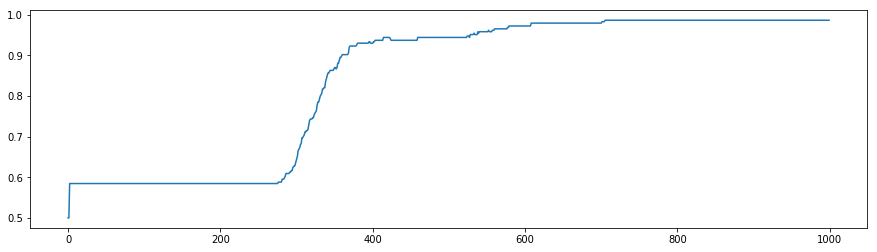

In [39]:
%matplotlib inline

plt.figure(figsize=(15, 4))
plt.plot(dnn_classifier_settings[0]['history'].history['val_acc'])

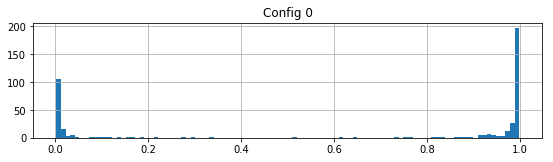

In [40]:
%matplotlib inline

plt.figure(figsize=(15, 20))
for index, setting in enumerate(dnn_classifier_settings):
    plt.subplot(10, 2, index + 1)
    plt.title('Config %d' % index)
    pd.Series(setting['training_predictions_onehot'][:, 1]).hist(bins=100)
plt.tight_layout()

In [41]:
boundary_range = np.linspace(0.7410, 0.8150, 10)

for boundary in boundary_range:
    training_predictions = dnn_classifier_settings[0]['training_predictions_onehot'] / boundary * 0.5
    validation_predictions = dnn_classifier_settings[0]['validation_predictions_onehot'] / boundary * 0.5
    training_predictions = pd.DataFrame(training_predictions).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)
    validation_predictions = pd.DataFrame(validation_predictions).apply(lambda val: 1.0 if val[1] > 0.5 else 0.0, axis=1)
    print('boundary: %.4f, training AUC score: %.4f, val AUC score: %.4f' % (boundary, metrics.roc_auc_score(training_targets, training_predictions), metrics.roc_auc_score(validation_targets, validation_predictions)))

boundary: 0.7410, training AUC score: 0.9731, val AUC score: 0.9819
boundary: 0.7492, training AUC score: 0.9731, val AUC score: 0.9759
boundary: 0.7574, training AUC score: 0.9764, val AUC score: 0.9759
boundary: 0.7657, training AUC score: 0.9778, val AUC score: 0.9759
boundary: 0.7739, training AUC score: 0.9778, val AUC score: 0.9759
boundary: 0.7821, training AUC score: 0.9778, val AUC score: 0.9759
boundary: 0.7903, training AUC score: 0.9778, val AUC score: 0.9759
boundary: 0.7986, training AUC score: 0.9778, val AUC score: 0.9759
boundary: 0.8068, training AUC score: 0.9778, val AUC score: 0.9759
boundary: 0.8150, training AUC score: 0.9760, val AUC score: 0.9699


# Model Evaluation

In [ ]:
classifier = dnn_classifier

In [ ]:
training_predictions = classifier.predict(training_data)
print(classifier.coef_)
print(pd.Series(training_predictions).value_counts())
print('Classifier: %s - acc: %.4f, auc: %.4f' % (classifier.__class__.__name__,
                                                 metrics.accuracy_score(training_targets, training_predictions),
                                                 metrics.roc_auc_score(training_targets, training_predictions)))

In [ ]:
## training_predictions = classifier.predict(training_data)
print(training_predictions)
if type(classifier) == Sequential:
    training_predictions = pd.DataFrame(training_predictions).apply(lambda val: 1.0 if val[1] > 0.1 else 0.0, axis=1)
    validation_predictions = classifier.predict(validation_data)
    validation_predictions = pd.DataFrame(validation_predictions).apply(lambda val: 1.0 if val[1] > 0.1 else 0.0, axis=1)
else:
    print(training_predictions.max())

In [ ]:
training_targets

In [ ]:
pd.Series(training_targets).value_counts()

In [ ]:
training_predictions.value_counts()

In [ ]:
print(metrics.accuracy_score(training_targets, training_predictions))
print(metrics.roc_auc_score(training_targets, training_predictions))
print(metrics.accuracy_score(validation_targets, validation_predictions))
print(metrics.roc_auc_score(validation_targets, validation_predictions))

# Prepare submission.csv